
##  Gradient Descent 

## Overview
In this notebook, I am trying to learn a simple linear regression problem by gradient descent.  
Gradient descent is an optimization algorithm that's used when training a machine learning model. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.
Gadient descent is the most popular optimization strategy used in machine learning and deep learning at the moment. It is used when training data models, can be combined with every algorithm and is easy to understand and implement. 


# What is a Gradient?

In machine learning, a gradient is a derivative of a function that has more than one input variable. Known as the slope of a function in mathematical terms, the gradient simply measures the change in all weights with regard to the change in error.

In [1]:
# Preliminaries - packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Data from a known distribution
$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [2]:
np.random.seed(1234)  

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
#Error with mean 0 and std deviation .5
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T

In [5]:
x_mat[:5]

array([[1.        , 1.9151945 , 7.67116628],
       [1.        , 6.22108771, 7.08115362],
       [1.        , 4.37727739, 7.96867184],
       [1.        , 7.85358584, 5.57760828],
       [1.        , 7.79975808, 9.65836532]])

In [6]:
y[:5]

array([44.00060834, 49.44119069, 50.57415314, 45.58928189, 65.35503861])

## Solving Parameters using Scikit-learn Linear Regression model

In [7]:

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

## Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

In [8]:
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Solving by Gradient Descent


In [9]:
learning_rate = 1e-3
num_iter = 10000
theta_initial = np.array([3,3,3])

In [10]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    theta_path = np.zeros((num_iter+1,3))
    theta_path[0,:]= theta_initial

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        grad_vec = grad_vec
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]=theta
    return theta_path, loss_vec

In [11]:
theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)

In [12]:
theta_path

array([[3.        , 3.        , 3.        ],
       [3.0040861 , 3.01332901, 3.03957461],
       [3.00788661, 3.02507893, 3.0772721 ],
       ...,
       [1.93625202, 1.95792066, 4.97633957],
       [1.93619616, 1.95792552, 4.97634398],
       [1.93614031, 1.95793038, 4.97634839]])

In [13]:
loss_vec

array([6030.84477131, 5688.39319737, 5382.14185518, ...,   26.89893211,
         26.89829943,   26.8976669 ])

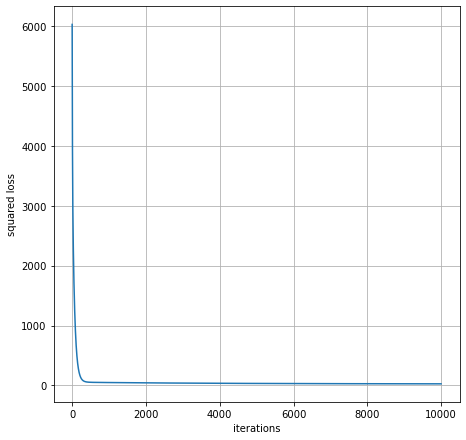

In [16]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2, 2, 1)
ax.plot(loss_vec)
ax.set(xlabel='iterations', ylabel='squared loss')
ax.grid(True)

In [ ]:
#dercreasing number of iterations 
learning_rate = 1e-3
num_iter = 100
theta_initial = np.array([3,3,3])

In [17]:
theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)


In [18]:
theta_path

array([[3.        , 3.        , 3.        ],
       [3.0040861 , 3.01332901, 3.03957461],
       [3.00788661, 3.02507893, 3.0772721 ],
       ...,
       [1.93625202, 1.95792066, 4.97633957],
       [1.93619616, 1.95792552, 4.97634398],
       [1.93614031, 1.95793038, 4.97634839]])

In [19]:
loss_vec

array([6030.84477131, 5688.39319737, 5382.14185518, ...,   26.89893211,
         26.89829943,   26.8976669 ])

In [20]:
#dercreasing number of iterations 
learning_rate = 1e-1
num_iter = 100
theta_initial = np.array([3,3,3])
theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)


In [21]:
theta_path

array([[ 3.00000000e+00,  3.00000000e+00,  3.00000000e+00],
       [ 3.40860985e+00,  4.33290090e+00,  6.95746086e+00],
       [ 9.61375099e-01, -1.01251113e+01, -7.85627356e+00],
       [ 1.42042217e+01,  6.76944931e+01,  7.43511914e+01],
       [-5.83385868e+01, -3.58062714e+02, -3.74975004e+02],
       [ 3.38232987e+02,  1.97012227e+03,  2.08216823e+03],
       [-1.83050073e+03, -1.07613312e+04, -1.13544691e+04],
       [ 1.00288941e+04,  5.88594153e+04,  6.21225093e+04],
       [-5.48231908e+04, -3.21854978e+05, -3.39679320e+05],
       [ 2.99814126e+05,  1.76004533e+06,  1.85753562e+06],
       [-1.63948629e+06, -9.62462766e+06, -1.01577244e+07],
       [ 8.96539270e+06,  5.26313693e+07,  5.55465776e+07],
       [-4.90263753e+07, -2.87809604e+08, -3.03751123e+08],
       [ 2.68096069e+08,  1.57385934e+09,  1.66103404e+09],
       [-1.46605773e+09, -8.60649950e+09, -9.08320595e+09],
       [ 8.01699671e+09,  4.70638205e+10,  4.96706443e+10],
       [-4.38401808e+10, -2.57364008e+11

In [22]:
loss_vec

array([6.03084477e+003, 6.73215975e+004, 2.00817650e+006, 6.00497435e+007,
       1.79569283e+009, 5.36974051e+010, 1.60573754e+012, 4.80170887e+013,
       1.43587650e+015, 4.29376578e+016, 1.28398401e+018, 3.83955486e+019,
       1.14815928e+021, 3.43339209e+022, 1.02670261e+024, 3.07019478e+025,
       9.18094090e+026, 2.74541786e+028, 8.20974595e+029, 2.45499709e+031,
       7.34128770e+032, 2.19529813e+034, 6.56469828e+035, 1.96307112e+037,
       5.87025945e+038, 1.75540996e+040, 5.24928101e+041, 1.56971600e+043,
       4.69399203e+044, 1.40366545e+046, 4.19744365e+047, 1.25518037e+049,
       3.75342204e+050, 1.12240260e+052, 3.35637074e+053, 1.00367057e+055,
       3.00132104e+056, 8.97498467e+057, 2.68382985e+059, 8.02557655e+060,
       2.39992409e+062, 7.17660044e+063, 2.14605096e+065, 6.41743227e+066,
       1.91903350e+068, 5.73857180e+069, 1.71603082e+071, 5.13152378e+072,
       1.53450253e+074, 4.58869162e+075, 1.37217700e+077, 4.10328231e+078,
       1.22702288e+080, 3

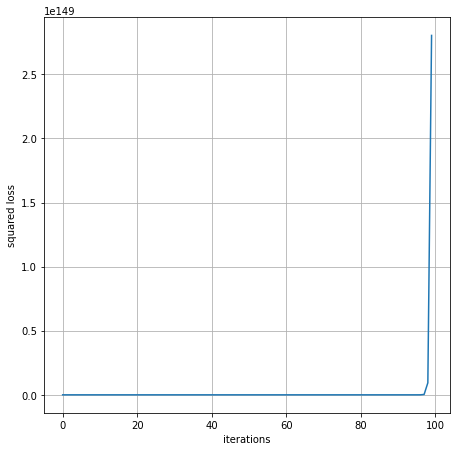

In [23]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2, 2, 1)
ax.plot(loss_vec)
ax.set(xlabel='iterations', ylabel='squared loss')
ax.grid(True)

# The Learning rate
This size of steps taken to reach the minimum or bottom is called Learning Rate. We can cover more area with larger steps/higher learning rate but are at the risk of overshooting the minima. On the other hand, small steps/smaller learning rates will consume a lot of time to reach the lowest point.A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.

For gradient descent to reach the local minimum we must set the learning rate to an appropriate value, which is neither too low nor too high. This is important because if the steps it takes are too big, it may not reach the local minimum because it bounces back and forth between the convex function of gradient descent (see left image below). If we set the learning rate to a very small value, gradient descent will eventually reach the local minimum but that may take a while (see the right image). 



## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out. 

Stochastic gradient descent (SGD) does this for each training example within the dataset, meaning it updates the parameters for each training example one by one. Depending on the problem, this can make SGD faster than batch gradient descent. One advantage is the frequent updates allow us to have a pretty detailed rate of improvement.

The frequent updates, however, are more computationally expensive than the batch gradient descent approach. Additionally, the frequency of those updates can result in noisy gradients, which may cause the error rate to jump around instead of slowly decreasing.



In [28]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    # below are different in STOCHASTIC gradient descent
    theta_path = np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:] = theta_initial
    loss_vec = np.zeros(num_iter*num_obs)

    ## Main SGD loop
    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            count+=1
            y_pred = np.dot(theta.T,x_mat.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
            theta = theta + learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

In [29]:
## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3, 3, 3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)

In [30]:
theta_path

array([[3.        , 3.        , 3.        ],
       [3.00122415, 3.00234449, 3.00939068],
       [3.00186937, 3.00635844, 3.01395955],
       ...,
       [2.86596059, 1.8779056 , 4.90165229],
       [2.86592484, 1.87788517, 4.90136538],
       [2.86601708, 1.87850268, 4.90223761]])

In [31]:
loss_vec

array([6030.84477131, 5949.75553112, 5903.28213363, ...,   48.40016985,
         48.39997699,   48.40134023])

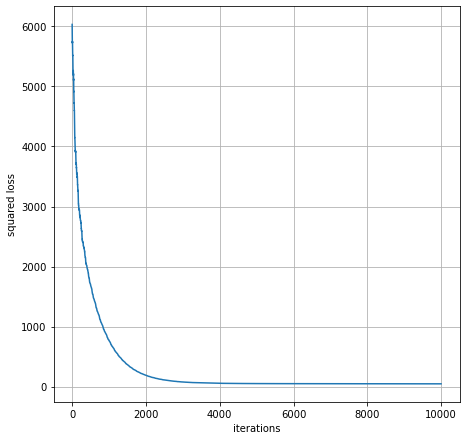

In [32]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2, 2, 1)
ax.plot(loss_vec)
ax.set(xlabel='iterations', ylabel='squared loss')
ax.grid(True)